Computing Methods for Physics 
===============

Marco De Tommasi, 1760258

-------------------------------

# Distribuzione delle Energie

Importo i pacchetti:

In [37]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Definisco le masse dei bersagli:

In [38]:
massaprotone=0.9382
massaneutrone=0.9396
MassAcqua=10*massaprotone+8*massaneutrone
MassDeut=10*massaprotone+10*massaneutrone

Definisco una funzione *E_theta* che mi restituisce il valore energetico in funzione dell'angolo,dell'energia e della massa del bersaglio:

In [39]:
def E_theta(E0,theta,MassaNucl):
    Etheta=E0/(1+E0/MassaNucl*(1-np.cos(theta)))
    return Etheta

# Distribuzione dell'energia in funzione dell'energia del proiettile

Fisso il valore angolare *Theta0* pari a $\frac{\pi}{2}$, ovvero pari alla quantità richiesta e genero una lista *E0* corrispondente alle energie dei proiettili, comprese tra *1 MeV* e *10 GeV*. Esegue il grafico per entrambi i nuclei bersaglio.

<IPython.core.display.Javascript object>


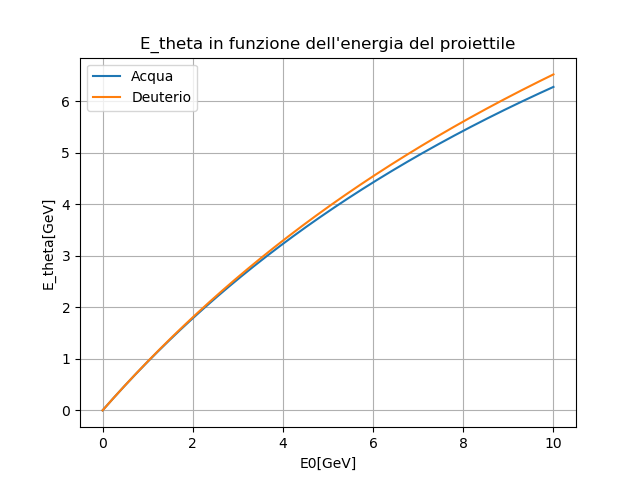

In [40]:
E0 = np.linspace(0.001,10, 1000)
theta0=np.pi/2
EthetaW_En=E_theta(E0,theta0,MassAcqua)
EthetaD_En=E_theta(E0,theta0,MassDeut)

plt.figure()
plt.plot(E0,EthetaW_En, label="Acqua")
plt.plot(E0,EthetaD_En, label="Deuterio")
plt.title("E_theta in funzione dell'energia del proiettile")
plt.xlabel("E0[GeV]")
plt.ylabel("E_theta[GeV]")
plt.legend()
plt.grid()
plt.show()

# Distribuzione di E in funzione dell'angolo di scattering

Fisso questa volta il valore dell'energia $E_0= 1 \, GeV$ ed eseguo il grafico in funzione dell'angolo $\theta$, definisco una lista *theta* di mille punti compresi tra $0$ e $\pi$

<IPython.core.display.Javascript object>


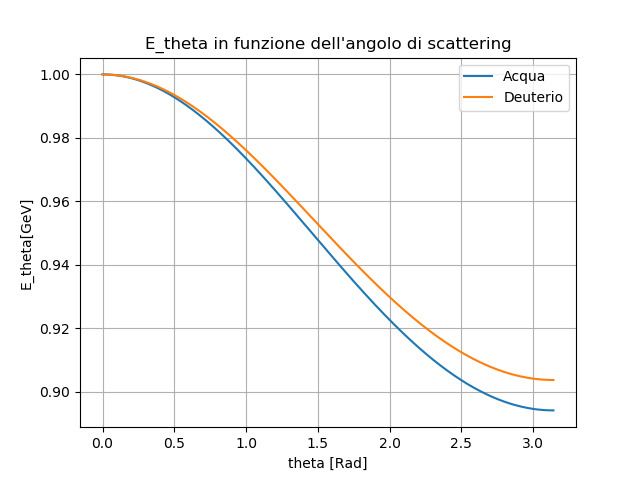

In [41]:
E0=1.
theta=np.linspace(0,np.pi,1000)
EthetaW_Ang=E_theta(E0,theta,MassAcqua)
EthetaD_Ang=E_theta(E0,theta,MassDeut)

plt.figure()
plt.plot(theta,EthetaW_Ang,label="Acqua")
plt.plot(theta,EthetaD_Ang,label="Deuterio")
plt.title("E_theta in funzione dell'angolo di scattering")
plt.xlabel("theta [Rad]")
plt.ylabel("E_theta[GeV]")
plt.legend()
plt.grid()
plt.show()

Si vuole ora stimare il valore energetico di un fascio di particelle a partire da una distribuzione esponenziale, per farlo definisco la funzione *Energy*. Attraverso il ciclo *while* è possibile selezionare le energie in modo da ottenere un numero il numero di particelle appartenenti al fascio, nel range energetico richiesto. 

In [42]:
def Energy(param):
    energy=20
    while(energy>10 or energy<0.001):
        energy=np.random.exponential(param)
    return energy  

Siccome il rapporto tra le popolazioni dato è pari a $\frac{N(10\,GeV)}{N(1 \,MeV)}=0.1$ si ottiene, considerando la distribuzione $ \lambda e^{- \lambda x}$ un valore di $ \lambda =\frac{log(10)}{9.999} \, GeV^{-1} $. Tuttavia, la funzione $numpy.random.exponential$ utilizza come parametro la grandezza $\beta = \frac{1}{\lambda}$, che quindi vado a definire. Genero quindi il fascio di particelle ad energia $ E_{0} $ :

In [43]:
Nparticles=range(1000000)
lamb=np.log(10)/9.999
beta=1/lamb
E0beam=np.array([Energy(beta)for n in Nparticles])

Al fine di estrarre i valori di $\theta$ dalla distribuzione delle energie, implemento la funzione *E_thetadist*,che permette di estrarre angoli $\theta$ secondo la distribuzione energetica *E_theta*, la quale deve essere valutata a partire dall'energia del proiettile proveniente dal fascio $E_p$. La funzione seleziona i soli valori che si trovano nell'area definita dalla distribuzione di probabilità, attraverso un confronto tra un valore uniforme $y$ generato tra il valore nullo e il valore massimo della distribuzione(coincidente con $E_p)$ e il valore della pdf, valutato nel valore dell'angolo generato uniformemente $alpha$ . 

In [49]:
def E_thetadist(Ep,distrib,MassNucleo):
    while True:
        alpha=np.random.uniform(0,np.pi)
        y=np.random.uniform(0,Ep)
        if(y<=distrib(Ep,alpha,MassNucleo)): break
    return alpha

utilizzo la funzione creata per generare prima le liste contenenti gli angoli totali ottenuti dal fascio $E_0$ in seguito al processo di scattering ed in seguito, scorro sugli elementi delle liste in modo da selezionare i soli angoli compresi tra $\frac{\pi}{2}$ e $\pi$, ovvero coincidenti con i processi di backscattering. Considero il caso di nuclei di acqua.

In [50]:
ThetaBackScatAcqua=np.array([ E_thetadist(E0beam[n],E_theta,MassAcqua)for n in Nparticles if (E_thetadist(E0beam[n],E_theta,MassAcqua)>np.pi/2)])

Otteniamo infine la frazione delle particelle che hanno effettuato il backscattering:

In [51]:
AcquaFraction=print("Frazione di particelle scatterate all'indietro per nuclei d'acqua :", len(ThetaBackScatAcqua)/len(Nparticles))

Frazione di particelle scatterate all'indietro per nuclei d'acqua : 0.453096


E analogamente, del Deuterio:

In [52]:
ThetaBackScatDeut=np.array([ E_thetadist(E0beam[n],E_theta,MassDeut) for n in Nparticles if (E_thetadist(E0beam[n],E_theta,MassDeut)>np.pi/2)])

In [53]:
DeuterioFraction=print("Frazione di particelle scatterate all'indietro per nuclei di Deuterio :",len(ThetaBackScatDeut)/len(Nparticles))

Frazione di particelle scatterate all'indietro per nuclei di Deuterio : 0.45664


Si nota che la frazione di particelle scatterate all'indietro dai nuclei di deuterio è leggermente maggiore. Ciò è dovudo alla dipendenza della distribuzione $E(\theta)$ dalla massa del bersaglio $M$.